In [7]:
import numpy as np
from scipy.ndimage import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2

In [8]:
DPI = 120

### load the image

Text(0.5, 1.0, 'Input image')

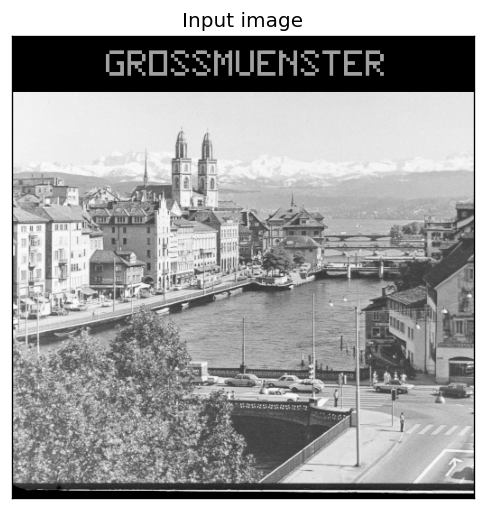

In [9]:
input_img=cv2.imread('inputs/grossmuenster.png', 0).astype('float')
plt.figure(figsize=(5, 5),dpi=DPI)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

### Gaussian blur the image

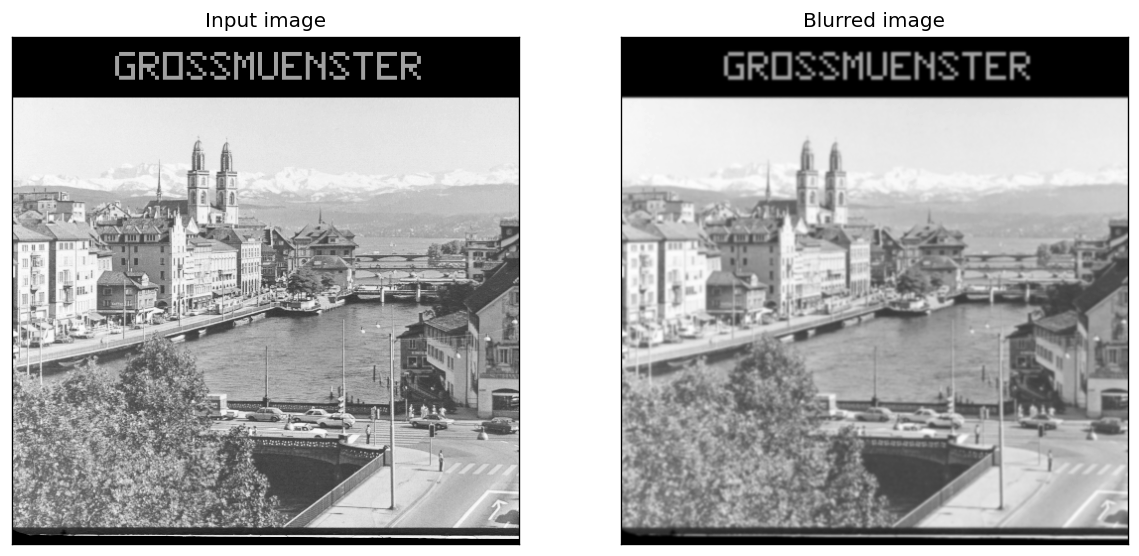

In [62]:
## TODO
blurred_img = gaussian_filter(input_img, sigma=1)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.title('Blurred image')
plt.show()

### Use Sobel filter to compute gradient along x and y

In [63]:
## TODO
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
I_x = convolve(blurred_img, sobel_kernel)
I_y = convolve(blurred_img, np.flip(sobel_kernel.T, axis=0))

### Compute gradient magnitude and direction

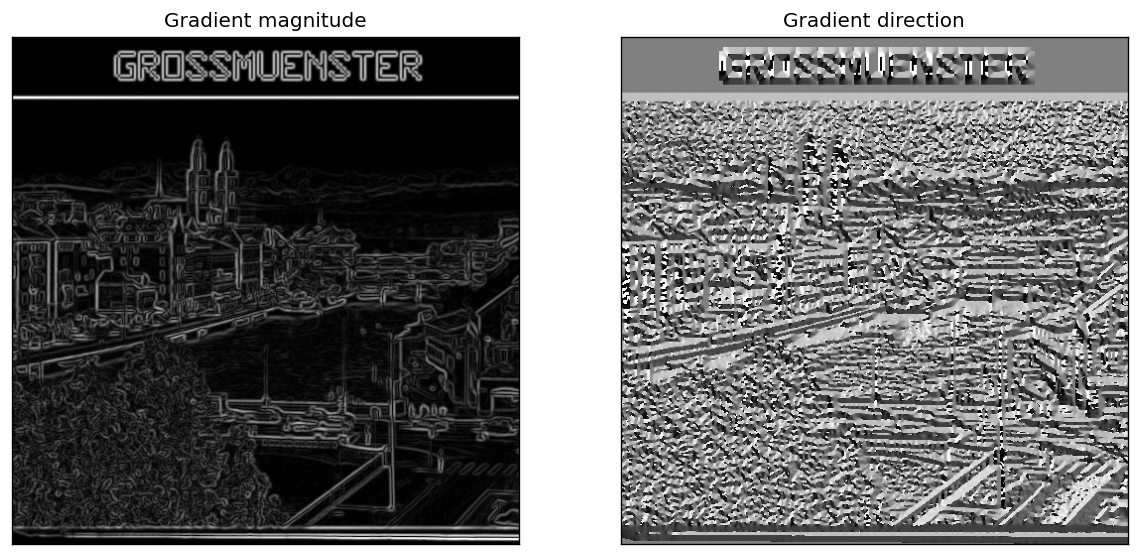

In [64]:
## TODO
magnitude = np.sqrt(I_x**2 + I_y**2)
direction = np.arctan2(I_y, I_x)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(magnitude, cmap = 'gray')
plt.title('Gradient magnitude')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(direction, cmap=plt.cm.gray)
plt.title('Gradient direction')
plt.show()

### Threshold the edges

In [68]:
## TODO
thresh= 0.1 * magnitude.max()
thresholdEdges = (magnitude > thresh)
magnitude = np.where(thresholdEdges, magnitude, 0)


### Apply NMS

In [77]:
## TODO
def non_max_suppression(magnitude, direction):
    M, N = magnitude.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            # try:
            q = 255
            r = 255

            #angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                Z[i,j] = magnitude[i,j]
            else:
                Z[i,j] = 0

            # except IndexError as e:
            #     pass

    return Z

edges = non_max_suppression(magnitude, direction)

# edges = edges == thresholdEdges

### Visualise the Canny edges

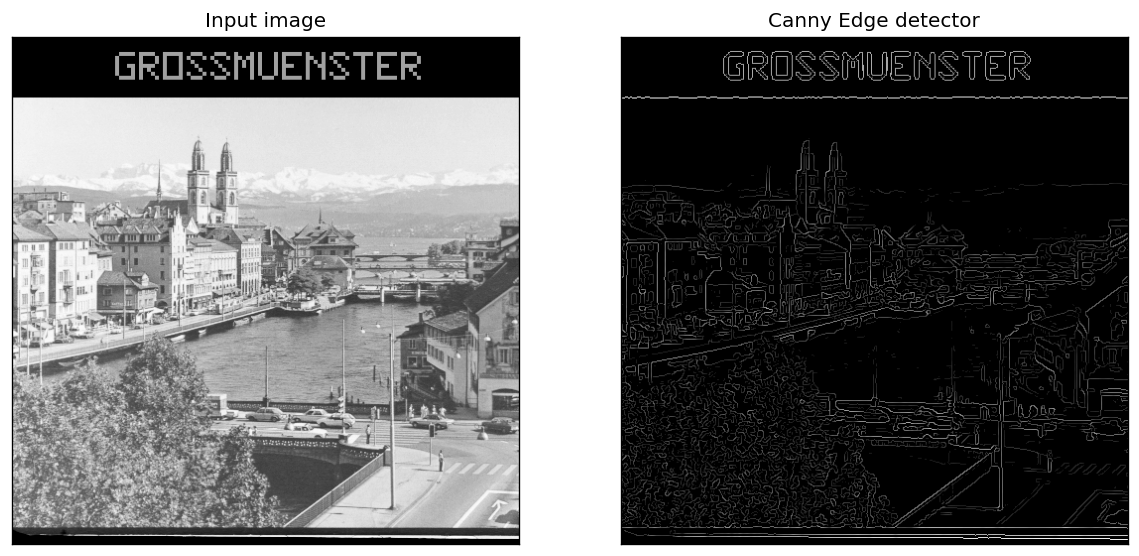

In [78]:
plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('Canny Edge detector')
plt.show()